# ML Answers

- **Answer Set**: No. 01
- **Full Name**: Mohammad Hosein Nemati
- **Student Code**: `610300185`

---

## Basics

In this section we will done some basic steps:

### Libraries

Before begin, we must import these required libraries:

In [8]:
import numpy as np
import sklearn as sk
import sklearn.svm
import sklearn.tree
import sklearn.ensemble
import sklearn.tree
import sklearn.metrics
import xgboost as xgb
import matplotlib.pyplot as plt

### Dataset

Now we can load our dataset:

In [9]:
labels = np.loadtxt("../lib/labels.txt", dtype=str, delimiter='\n', skiprows=0)
data_set = np.loadtxt("../lib/data.txt", delimiter=',', skiprows=0)

np.random.shuffle(data_set)

train_set = data_set[0:4000, :]
test_set = data_set[4000:-1, :]

train_features = train_set[:, :-1]
train_labels = (train_set[:, -1] - 1).astype(int)

test_features = test_set[:, :-1]
test_labels = (test_set[:, -1] - 1).astype(int)

print(f"Train Features: {train_features.shape}")
print(f"Test Features: {test_features.shape}")

Train Features: (4000, 534)
Test Features: (479, 534)


---

## Problem

### Decision Tree

In [10]:
decision_tree_model = sk.model_selection.GridSearchCV(
    estimator=sk.tree.DecisionTreeClassifier(), 
    param_grid={
        "criterion": ["gini", "entropy"],
        "max_depth": [10, 50, 100, None]
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

decision_tree_predicts = decision_tree_model.predict(test_features)

### Random Forest

In [11]:
random_forest_model = sk.model_selection.GridSearchCV(
    estimator=sk.ensemble.RandomForestClassifier(), 
    param_grid={
        "criterion": ["gini", "entropy"],
        "max_depth": [10, 50, 100, None]
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

random_forest_predicts = random_forest_model.predict(test_features)

### XGBoost

In [12]:
xgb.set_config(verbosity=0)

xgboost_model = sk.model_selection.GridSearchCV(
    estimator=xgb.XGBClassifier(use_label_encoder=False), 
    param_grid={},
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

xgboost_predicts = xgboost_model.predict(test_features)

### SVM

In [13]:
svm_model = sk.model_selection.GridSearchCV(
    estimator=sk.svm.SVC(), 
    param_grid={},
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

svm_predicts = svm_model.predict(test_features)

### Results

c:\Users\KoLiBer\Documents\Workspace\mlexercises\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


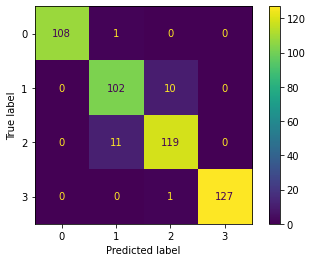

c:\Users\KoLiBer\Documents\Workspace\mlexercises\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


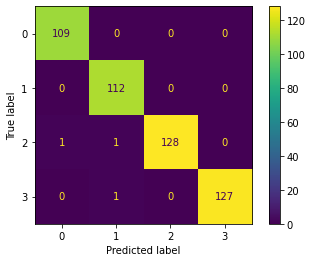

c:\Users\KoLiBer\Documents\Workspace\mlexercises\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


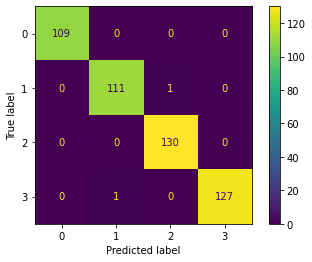

c:\Users\KoLiBer\Documents\Workspace\mlexercises\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


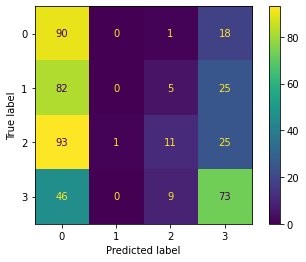

In [14]:
sk.metrics.plot_confusion_matrix(decision_tree_model, test_features, test_labels)
plt.show()

sk.metrics.plot_confusion_matrix(random_forest_model, test_features, test_labels)
plt.show()

sk.metrics.plot_confusion_matrix(xgboost_model, test_features, test_labels)
plt.show()

sk.metrics.plot_confusion_matrix(svm_model, test_features, test_labels)
plt.show()

# print(sk.metrics.classification_report(test_labels, test_predicts, digits=3))

---